In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


In [2]:
globalTemps = pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")
globalTemps.set_index('dt', inplace=True) # Set index of globalTemps to dt (date) field
globalTemps.tail(n=12) # Display the last 12 rows of data in globalTemps

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
2015-01-01,3.881,0.130,9.432,0.090,-1.518,0.097,14.255,0.066
2015-02-01,4.664,0.121,10.497,0.092,-1.138,0.113,14.564,0.067
2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061
2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061
2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058
2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057
2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058


In [3]:
globalTemps1700s = globalTemps.loc['1750-01-01':'1799-12-01'] # Create a slice of globalTemps dataframe of only dates from the 1700s
globalTemps1800s = globalTemps.loc['1800-01-01':'1899-12-01'] # Create a slice of globalTemps dataframe of only dates from the 1800s
globalTemps1900s = globalTemps.loc['1900-01-01':'1999-12-01'] # Create a slice of globalTemps dataframe of only dates from the 1900s
globalTemps2000s = globalTemps.loc['2000-01-01':'2015-12-01'] # Create a slice of globalTemps dataframe of only dates from the 2000s
globalTemps1700s

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1799-08-01,14.086,1.083,NaN,NaN,NaN,NaN,NaN,NaN
1799-09-01,12.311,1.378,NaN,NaN,NaN,NaN,NaN,NaN
1799-10-01,9.606,1.369,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
avgGlobalTemps1700s = globalTemps1700s['LandAverageTemperature'].mean() # Get the average land temp from the 1700s
avgGlobalTemps1800s = globalTemps1800s['LandAverageTemperature'].mean() # Get the average land temp from the 1800s
avgGlobalTemps1900s = globalTemps1900s['LandAverageTemperature'].mean() # Get the average land temp from the 1900s
avgGlobalTemps2000s = globalTemps2000s['LandAverageTemperature'].mean() # Get the average land temp from the 2000s
print('Average land temp of the 1700s in Celsius:', avgGlobalTemps1700s)
print('Average land temp of the 1800s in Celsius:', avgGlobalTemps1800s)
print('Average land temp of the 1900s in Celsius:', avgGlobalTemps1900s)
print('Average land temp of the 2000s in Celsius:', avgGlobalTemps2000s)

Average land temp of the 1700s in Celsius: 8.20303231292517
Average land temp of the 1800s in Celsius: 8.009105
Average land temp of the 1900s in Celsius: 8.637711666666668
Average land temp of the 2000s in Celsius: 9.54209375


In [5]:
avgGlobalLandAndOceanTemps1700s = globalTemps1700s['LandAndOceanAverageTemperature'].mean() # Get the average land and ocean temps from the 1700s
avgGlobalLandAndOceanTemps1800s = globalTemps1800s['LandAndOceanAverageTemperature'].mean() # Get the average land and ocean temps from the 1800s
avgGlobalLandAndOceanTemps1900s = globalTemps1900s['LandAndOceanAverageTemperature'].mean() # Get the average land and ocean temps from the 1900s
avgGlobalLandAndOceanTemps2000s = globalTemps2000s['LandAndOceanAverageTemperature'].mean() # Get the average land and ocean temps from the 2000s
print('Average land and ocean temps of the 1700s in Celsius:', avgGlobalLandAndOceanTemps1700s)
print('Average land and ocean temps of the 1800s in Celsius:', avgGlobalLandAndOceanTemps1800s)
print('Average land and ocean temps of the 1900s in Celsius:', avgGlobalLandAndOceanTemps1900s)
print('Average land and ocean temps of the 2000s in Celsius:', avgGlobalLandAndOceanTemps2000s)

Average land and ocean temps of the 1700s in Celsius: nan
Average land and ocean temps of the 1800s in Celsius: 14.970208333333334
Average land and ocean temps of the 1900s in Celsius: 15.236225000000001
Average land and ocean temps of the 2000s in Celsius: 15.822062500000001


In [6]:
# Create a dictionary that contains all of the average land temps and average land and ocean temps from each century
landAndOceanTempData = {'Avg Land Temps': [avgGlobalTemps1700s, 
                                   avgGlobalTemps1800s, 
                                   avgGlobalTemps1900s, 
                                   avgGlobalTemps2000s],
               'Avg Land and Ocean Temps': [avgGlobalLandAndOceanTemps1700s, 
                                            avgGlobalLandAndOceanTemps1800s, 
                                            avgGlobalLandAndOceanTemps1900s, 
                                            avgGlobalLandAndOceanTemps2000s]}

landAndOceanTempData

{'Avg Land Temps': [8.20303231292517, 8.009105, 8.637711666666668, 9.54209375],
 'Avg Land and Ocean Temps': [nan,
  14.970208333333334,
  15.236225000000001,
  15.822062500000001]}

In [7]:
# Create a dataframe that contains the average land and average land and ocean temps from each century
tempsDataFrame = pd.DataFrame(landAndOceanTempData, index = ['1700s', '1800s', '1900s', '2000s'])
tempsDataFrame

,Avg Land Temps,Avg Land and Ocean Temps
1700s,8.203032,NaN
1800s,8.009105,14.970208
1900s,8.637712,15.236225
2000s,9.542094,15.822063


<AxesSubplot:xlabel='Avg Land Temps', ylabel='Avg Land and Ocean Temps'>

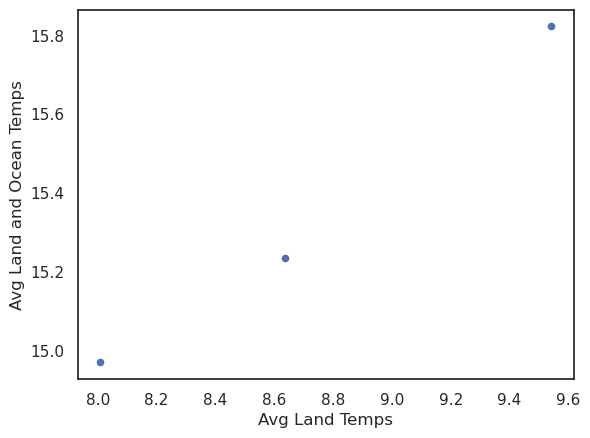

In [8]:
tempsDataFrame.plot(kind='scatter', x='Avg Land Temps', y='Avg Land and Ocean Temps')

<AxesSubplot:xlabel='dt', ylabel='LandAndOceanAverageTemperature'>

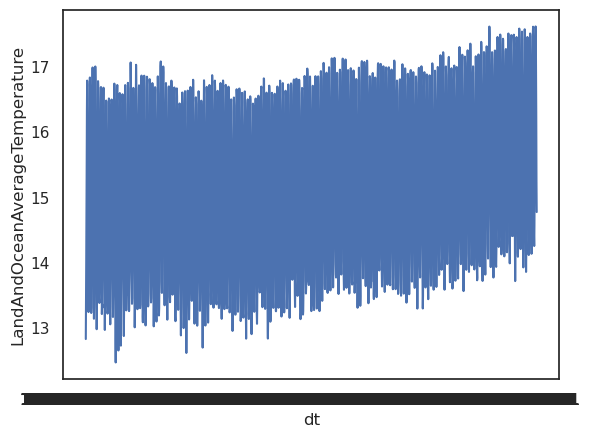

In [9]:
sns.lineplot(globalTemps, x='dt', y='LandAndOceanAverageTemperature')

<AxesSubplot:xlabel='dt', ylabel='LandAndOceanAverageTemperature'>

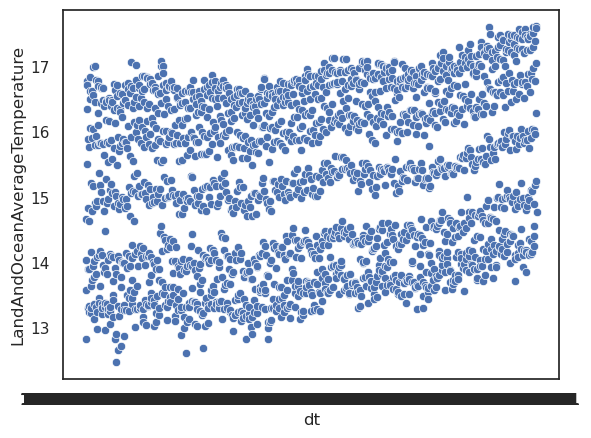

In [10]:
sns.scatterplot(globalTemps, x='dt', y='LandAndOceanAverageTemperature')